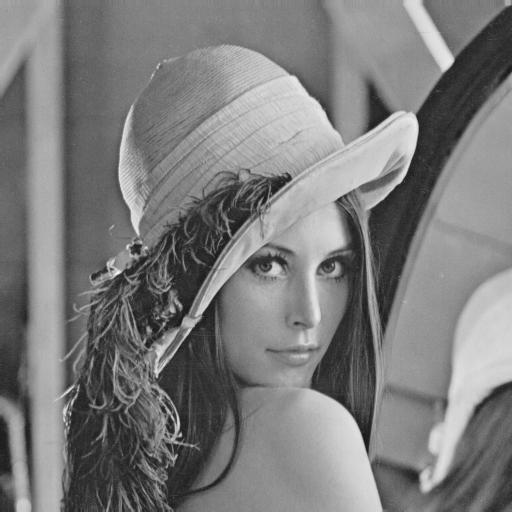

In [1]:
#### origin image
import numpy as np
from PIL import Image
import cv2

# 用來顯示圖片的函數
from IPython.display import display
def show(img_array):
    display(Image.fromarray(img_array))

img_array = cv2.imread('lena.bmp')
img_array_g = cv2.imread('lena.bmp',cv2.IMREAD_GRAYSCALE)

show(img_array)

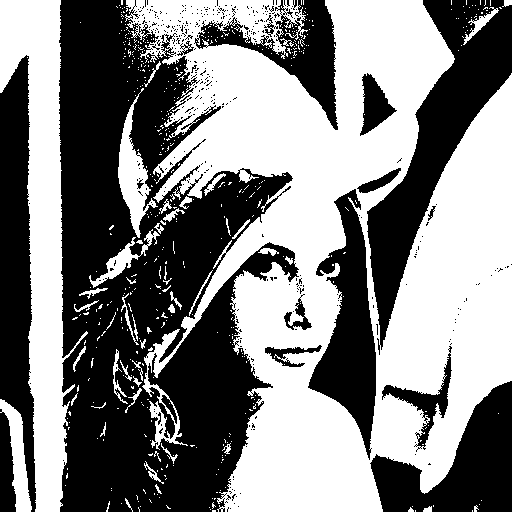

In [42]:
# binary image
# img_b_array = np.zeros(img_array_g.shape,dtype = img_array.dtype)
# for i in range(img_array_g.shape[0]):
#     for j in range(img_array_g.shape[1]):
#         if(img_array_g[i][j]<128):
#             img_b_array[i][j] = 0
#         else:
#             img_b_array[i][j] = 255
# show(img_b_array)
img_b_array = np.uint8(np.copy(img_array_g)>=128)*255
show(img_b_array)

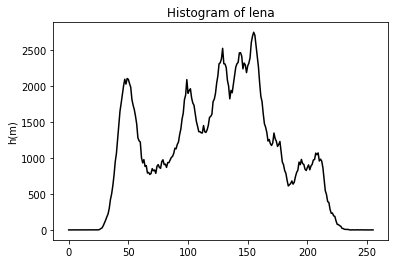

In [43]:
# histogram
import matplotlib.pyplot as plt
pixel_count = [0 for i in range(256)]
for p in img_array.flatten():
    pixel_count[int(p)] += 1
plt.title('Histogram of lena')
plt.ylabel('h(m)')
plt.plot([i for i in range(256)],pixel_count,color='black')

In [16]:
def update_label_8connected(l,c,row_num,col_num,img_label):
    label = img_label[l][c]
    compare_list = [label]
    if (l > 0 and img_label[l-1][c] != 0):
        compare_list.append(img_label[l-1][c])
    if (l < row_num - 1 and img_label[l+1][c] != 0):
        compare_list.append(img_label[l+1][c])
            
    if (c > 0 and img_label[l][c-1] != 0):
        compare_list.append(img_label[l][c-1])
    if (c < col_num - 1 and img_label[l][c+1] != 0):
        compare_list.append(img_label[l][c+1])
    
    if (l > 0 and c >0 and img_label[l-1][c-1] != 0):
        compare_list.append(img_label[l-1][c-1])
    if (l > 0 and c < col_num - 1 and img_label[l-1][c+1] != 0):
        compare_list.append(img_label[l-1][c+1])
            
    if (l < row_num - 1 and c > 0 and img_label[l+1][c-1] != 0):
        compare_list.append(img_label[l+1][c-1])
    if (l < row_num - 1 and c < col_num - 1 and img_label[l+1][c+1] != 0):
        compare_list.append(img_label[l+1][c+1])
    
    return min(compare_list)

In [17]:
# iterative algo
def update_label_4connected(l,c,row_num,col_num,img_label):
    label = img_label[l][c]
    compare_list = [label]
    if (l > 0 and img_label[l-1][c] != 0):
        compare_list.append(img_label[l-1][c])
    if (l < row_num - 1 and img_label[l+1][c] != 0):
        compare_list.append(img_label[l+1][c])
    if (c > 0 and img_label[l][c-1] != 0):
        compare_list.append(img_label[l][c-1])
    if (c < col_num - 1 and img_label[l][c+1] != 0):
        compare_list.append(img_label[l][c+1])
    return min(compare_list)

def iterative_algo(img_b_array):
    row_num,col_num = img_b_array.shape
    global_label = 0
    
    # initialize
    img_label = np.zeros(img_b_array.shape)
    for l in range(row_num):
        for c in range(col_num):
            if(img_b_array[l][c] != 0):
                global_label += 1
                img_label[l][c] = global_label
    
    # calculate components
    change = True
    run = 0
    while(change == True):
        change = False
        run += 1
        # Top down
        for l in range(row_num):
            for c in range(col_num):
                if(img_label[l][c] != 0):
                    m = update_label_4connected(l,c,row_num,col_num,img_label)
                    if (m != img_label[l][c]):
                        change = True
                    img_label[l][c] = m
        # bottom up
        for l in range(row_num-1,-1,-1):
            for c in range(col_num-1,-1,-1):
                if(img_label[l][c] != 0):
                    m = update_label_4connected(l,c,row_num,col_num,img_label)
                    if (m != img_label[l][c]):
                        change = True
                    img_label[l][c] = m
    return img_label

In [18]:
img_label = iterative_algo(img_b_array)

In [19]:
def caculate_labeldic_and_importantlabel(img_label,threshold):
    label_dic = {}
    for i in range(img_label.shape[0]):
        for j in range(img_label.shape[1]):
            if img_label[i][j] in label_dic:
                label_dic[img_label[i][j]] += 1
            else:
                label_dic[img_label[i][j]] = 1

    important_label = []
    for key in label_dic:
        if(label_dic[key] >= threshold and key != 0):
            important_label.append(key)
    
    return label_dic,important_label

In [20]:
label_dic,important_label = caculate_labeldic_and_importantlabel(img_label,500)
print(label_dic)
print(important_label)

{1.0: 18363, 0.0: 128184, 62.0: 10, 64.0: 107293, 222.0: 5, 223.0: 5, 322.0: 5, 323.0: 5, 324.0: 5, 325.0: 6, 326.0: 6, 327.0: 48, 1731.0: 1, 1983.0: 1, 1984.0: 1, 2052.0: 2, 2298.0: 1, 2363.0: 1, 2364.0: 1, 2616.0: 1, 2617.0: 7, 2620.0: 300, 2624.0: 4, 2686.0: 1, 2687.0: 6, 2832.0: 1, 3237.0: 1, 3238.0: 1, 3549.0: 2, 3617.0: 3, 3769.0: 2, 3936.0: 1, 4184.0: 1, 4185.0: 4, 4187.0: 1, 4402.0: 1, 4571.0: 4, 4718.0: 1, 4817.0: 1, 5473.0: 3, 5806.0: 1, 5879.0: 1, 6132.0: 1, 6133.0: 1, 6134.0: 1, 6356.0: 1, 6368.0: 1, 6684.0: 1, 6685.0: 2, 6861.0: 2, 7180.0: 1, 7793.0: 1, 7858.0: 2, 7905.0: 3, 8199.0: 2, 8378.0: 1, 8432.0: 3, 8442.0: 3, 8475.0: 2, 8582.0: 1, 8651.0: 4, 8712.0: 1, 8741.0: 1, 8852.0: 1, 8981.0: 2, 9021.0: 1, 9254.0: 2, 9291.0: 4, 9296.0: 1, 9470.0: 1, 9471.0: 1, 9472.0: 2, 9524.0: 1, 9532.0: 4, 9567.0: 2, 9568.0: 1, 9683.0: 1, 9838.0: 1, 9839.0: 1, 10071.0: 1, 10072.0: 8, 10210.0: 1, 10277.0: 1, 10278.0: 1, 10279.0: 1, 10368.0: 1, 10545.0: 2, 10639.0: 1, 10855.0: 3, 10857.0: 3

In [21]:
bounding_rows = [] 
bounding_cols = []
centers = []

for i in important_label:
    center = []
    
    up = 0
    down = 0
    boxes = []

    tmp = np.sum(img_label == i,axis = 1)
    count = 0
    for index,value in enumerate(tmp):
        if (up == 0 and value > 0):
            boxes.append(index)
            up = 1
        if (up == 1 and value == 0):
            boxes.append(index)
            break
        if (index == tmp.shape[0]-1 ):
            boxes.append(index)        
        count += (index+1)*value
        
    bounding_rows.append(boxes)
    center.append(int(count/tmp.sum()))
    
    up = 0
    down = 0
    boxes = []

    tmp = np.sum(img_label == i,axis = 0)
    count = 0
    for index,value in enumerate(tmp):
        if (up == 0 and value > 0):
            boxes.append(index)
            up = 1
        if (up == 1 and value == 0):
            boxes.append(index)
            break
        if (index == tmp.shape[0]-1 ):
            boxes.append(index)
        count += (index+1)*value
            
    bounding_cols.append(boxes)
    center.append(int(count/tmp.sum()))
    
    centers.append(center)

In [22]:
centers

[[230, 43], [244, 343], [175, 133], [260, 123], [458, 18]]

In [23]:
bounding_rows

[[0, 511], [0, 511], [88, 238], [229, 288], [399, 511]]

In [24]:
bounding_cols

[[0, 88], [125, 511], [118, 158], [89, 160], [0, 32]]

In [45]:
import sys
print(sys.version)

3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


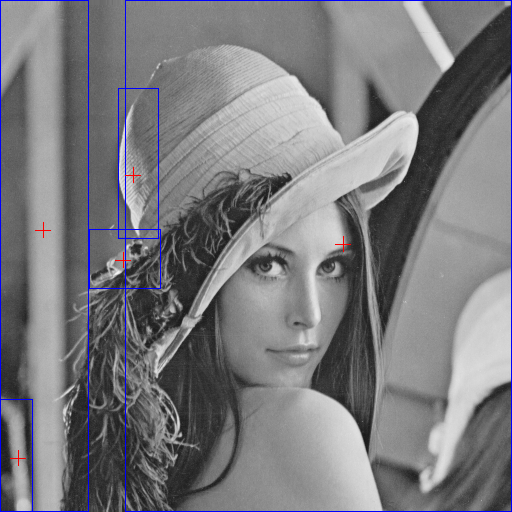

In [25]:
img_test = np.copy(img_array)
for i in range(len(important_label)):
    for l in range(512):
        if (l == bounding_rows[i][0] or l== bounding_rows[i][1]):
            for c in range(512):
                if(c >= bounding_cols[i][0] and c <= bounding_cols[i][1]):
                    img_test[l][c][0] = 0
                    img_test[l][c][1] = 0
                    img_test[l][c][2] = 255
                
        if (l >= bounding_rows[i][0] and l<= bounding_rows[i][1]):
            for c in range(512):
                if(c == bounding_cols[i][0] or c == bounding_cols[i][1]):
                    img_test[l][c][0] = 0
                    img_test[l][c][1] = 0
                    img_test[l][c][2] = 255
        
        if (l == centers[i][0]):
            for c in range(512):
                if(c == centers[i][1]):
                    for t in range(-8,8,1):
                        img_test[l+t][c][0] = 255
                        img_test[l+t][c][1] = 0
                        img_test[l+t][c][2] = 0
                        
                        img_test[l][c+t][0] = 255
                        img_test[l][c+t][1] = 0
                        img_test[l][c+t][2] = 0
show(img_test)

In [29]:
Image.fromarray(img_test).save('8connected.jpg')

In [5]:
# Caculate components
# efficient run_path algo
def construct_runtable_and_rowtable(img_b_array):
    run_table = []
    row_table = []
    row_num,col_num = img_b_array.shape
    run_num = 0
    
    for i in range(row_num):
        row_run = {}
        row_run['row_start'] = run_num
        row_run_num  = 0
        j = 0
        while (j < col_num):
            if (img_b_array[i][j] == 0):
                j += 1
            else:
                row_run_num += 1

                # record run
                run = {}
                run['row'] = i
                run['start_col'] = j
                run['perm_label'] = 0

                # record the end_col of the run
                while (j < col_num and img_b_array[i][j] != 0 ):
                    j += 1
                run['end_col'] = j-1 if j < col_num else j

                run_table.append(run)
        
        # record runs of the row 
        run_num += row_run_num
        if (row_run_num == 0):
            row_run['start'] = 0
            row_run['end'] = 0
        else:
            row_run['end'] = run_num - 1

        row_table.append(row_run)
        
    return run_table,row_table

def top_down_pass(img_b_array,row_table,run_table):
    row_num,col_num = img_b_array.shape
    
    for l in range(row_num):
        p = row_table[l]['row_start']
        plast = row_table[l]['row_end']
        
        if (l == 0):
            q,qlast = -1,-1
        else:
            q,qlast = row_table[l-1]['row_start'],row_table[l-1]['row_end']
        
        # initialize equivalence class
        if (p != -1 and q != -1):
            ds = disjoint_sets(run_table)
        
        # Scan 1 (for 4-connected)
        while(p <= plast and q <= qlast):
            # Check whether runs P and Q overlap
            if (run_table[p]['end_col'] < run_table[q]['start_col']):
                p += 1
            elif(run_table[p]['start_col'] > run_table[q]['end_col']):
                q += 1
            else:
                # There is some overlap between P and Q
                plabel = run_table[p]['perm_label']
                
                # update label
                if (plabel == 0):
                    run_table[p]['perm_label'] = run_table[q]['perm_label']
                elif (plabel != 0 and plabel != run_table[q]['perm_label']):
                    ds.union(plabel,run_table[q]['perm_label'])
                
                # move P and Q
                if(run_table[p]['end_col'] > run_table[q]['end_col']):
                    q += 1
                elif(run_table[p]['end_col'] < run_table[q]['end_col']):
                    p += 1
                elif (run_table[p]['end_col'] == run_table[q]['end_col']):
                    q += 1 
                    p += 1
        # Scan 2
        p = row_table[l]['row_start']
        while(p <= plast):
            plabel = run_table[p]['perm_label']
            
            if(plabel == 0):
                run_table[p]['perm_label'] = New_label()
            elif(plabel != 0 and Label(plabel) != 0):
                run_table[p]['perm_label'] = Label(plabel)
                
            p += 1
            
    return run_table

def bottom_up_pass(img_b_array,row_table,run_table,ds): 
    row_num,col_num = img_b_array.shape
    
    for l in range(row_num-1,-1,-1):
        p = row_table[l]['row_start']
        plast = row_table[l]['row_end']
        
        if (l == row_num-1):
            q,qlast = -1,-1
        else:
            q,qlast = row_table[l+1]['row_start'],row_table[l+1]['row_end']
        
        # initialize equivalence class
        if (p != -1 and q != -1):
            Initialize_Equiv()    
        
        # Scan 1 (for 4-connected)
        while(p <= plast and q <= qlast):
            # Check whether runs P and Q overlap
            if (run_table[p]['end_col'] < run_table[q]['start_col']):
                p += 1
            elif(run_table[p]['start_col'] > run_table[q]['end_col']):
                q += 1
            else:
                # There is some overlap between P and Q
                plabel = run_table[p]['perm_label']
                
                # update label
                if (plabel != run_table[q]['perm_label']):
                    Label(run_table[p]['perm_label']) = run_table[q]['perm_label']
                    run_table[p]['perm_label'] = run_table[q]['perm_label']
                
                # move P and Q
                if(run_table[p]['end_col'] > run_table[q]['end_col']):
                    q += 1
                elif(run_table[p]['end_col'] < run_table[q]['end_col']):
                    p += 1
                elif (run_table[p]['end_col'] == run_table[q]['end_col']):
                    q += 1 
                    p += 1
                    
        # Scan 2
        p = row_table[l]['row_start']
        while(p <= plast):
            
            # replace p's label by its class label            
            if(Label(run_table[p]['perm_label']) != 0):
                run_table[p]['perm_label'] = Label(run_table[p]['perm_label'])
                
            p += 1
            
    return run_table


def Initialize_Equiv(run_table):
    
def make_equivalent():
    pass
def Label():
    pass
def New_label():
    pass
def caculate_components(img_b_array,row_table,run_table):
    pass

In [24]:
class disjoint_sets:
    
    def __init__(self,run_table):
        self.groups = len(run_table)
        self.heads = [i for i in range(self.groups)]
        
    def find(x):
        if (x == self.heads[x]):
            return x
        else:
            self.heads[x] = find(self.heads[x])
    
    def union(x,y):
        x_head = self.find(x)
        y_head = self.find(y)
        if(x_head != y_head):
            self.heads[x_head] = y_head
            self.groups -= 1

In [23]:
len(run_table)

7152

In [18]:
aa = [1,2,3]#.extend([0])

In [20]:
aa.extend([1,2,3])

In [21]:
aa

[1, 2, 3, 0, 1, 2, 3]

In [6]:
run_table,row_table = construct_runtable_and_rowtable(img_b_array)

In [7]:
row_table

[{'row_start': 0, 'end': 22},
 {'row_start': 23, 'end': 45},
 {'row_start': 46, 'end': 68},
 {'row_start': 69, 'end': 91},
 {'row_start': 92, 'end': 114},
 {'row_start': 115, 'end': 137},
 {'row_start': 138, 'end': 165},
 {'row_start': 166, 'end': 192},
 {'row_start': 193, 'end': 224},
 {'row_start': 225, 'end': 256},
 {'row_start': 257, 'end': 287},
 {'row_start': 288, 'end': 314},
 {'row_start': 315, 'end': 340},
 {'row_start': 341, 'end': 367},
 {'row_start': 368, 'end': 395},
 {'row_start': 396, 'end': 417},
 {'row_start': 418, 'end': 439},
 {'row_start': 440, 'end': 463},
 {'row_start': 464, 'end': 490},
 {'row_start': 491, 'end': 511},
 {'row_start': 512, 'end': 538},
 {'row_start': 539, 'end': 573},
 {'row_start': 574, 'end': 603},
 {'row_start': 604, 'end': 635},
 {'row_start': 636, 'end': 669},
 {'row_start': 670, 'end': 710},
 {'row_start': 711, 'end': 748},
 {'row_start': 749, 'end': 783},
 {'row_start': 784, 'end': 806},
 {'row_start': 807, 'end': 838},
 {'row_start': 839, 